# **STOCKMARKET APP IN JUPYTER PYTHON CODE**

> **Explanation**:

*   Import Libraries : We import yfinance for fetching stock data, matplotlib for plotting, and ipywidgets for creating interactive widgets.
*   Fetch Stock Data : The fetch_stock_data function takes a ticker symbol and date range and returns the historical stock data.
*   Plot Stock Data : The plot_stock_data function takes the fetched data and plots the closing prices.
*   Create Interactive Widgets : We create text input for the ticker symbol and date pickers for the start and end dates. A button is also created to trigger the data fetching and plotting.
*   Button Click Handler : When the button is clicked, the handler function fetches the data and plots it if available.







In [19]:
# necessary libraries - !pip install yfinance matplotlib ipywidgets

# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Function to fetch stock data
def fetch_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date, end=end_date)
    return data

# Function to plot stock data
def plot_stock_data(data, ticker): # Added ticker parameter
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Close Price')
    plt.title(f'Stock Price for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Create interactive widgets
ticker_input = widgets.Text(
    value='AAPL',
    description='Ticker:',
    disabled=False
)

start_date_input = widgets.DatePicker(
    description='Start Date:',
    disabled=False
)

end_date_input = widgets.DatePicker(
    description='End Date:',
    disabled=False
)

button = widgets.Button(
    description='Fetch Data',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
)

# Define what happens when the button is clicked
def on_button_click(b):
    ticker = ticker_input.value
    start_date = start_date_input.value
    end_date = end_date_input.value

    if start_date and end_date:
        start_date = start_date.strftime('%Y-%m-%d')
        end_date = end_date.strftime('%Y-%m-%d')
        data = fetch_stock_data(ticker, start_date, end_date)
        if not data.empty:
            plot_stock_data(data, ticker) # Pass ticker to the plotting function
        else:
            print("No data found. Please check the ticker symbol and date range.")
    else:
        print("Please select both start and end dates.")

button.on_click(on_button_click)

# Display the widgets
display(ticker_input, start_date_input, end_date_input, button)


Text(value='AAPL', description='Ticker:')

DatePicker(value=None, description='Start Date:')

DatePicker(value=None, description='End Date:')

Button(description='Fetch Data', style=ButtonStyle(), tooltip='Click me')

# Additional Features:
You can extend this app by adding more features such as:

1.   Technical Indicators : Add moving averages, RSI, MACD, etc.
2.   Volume Analysis : Plot trading volume alongside the price chart.
3.   Multiple Stocks : Allow users to compare multiple stocks on the same chart.

> This is a basic framework, and you can build upon it to create a more sophisticated stock market analysis tool!



```
!pip install yfinance matplotlib ipywidgets pandas mplfinance ta
```



In [25]:
!pip install yfinance matplotlib ipywidgets pandas mplfinance ta

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.3 MB/s eta 0:00:00
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=ab070e041c43973a046349e2128650daeeb17254ce15981058f4eb19818f64d5
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [21]:

!pip install mplfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.1 MB/s eta 0:00:00


Text(value='AAPL', description='Ticker:')

DatePicker(value=None, description='Start Date:')

DatePicker(value=None, description='End Date:')

Button(description='Fetch Data', style=ButtonStyle(), tooltip='Click me')

Text(value='AAPL,MSFT', description='Multiple Tickers (comma-separated):')

Button(description='Compare Stocks', style=ButtonStyle(), tooltip='Compare selected stocks')

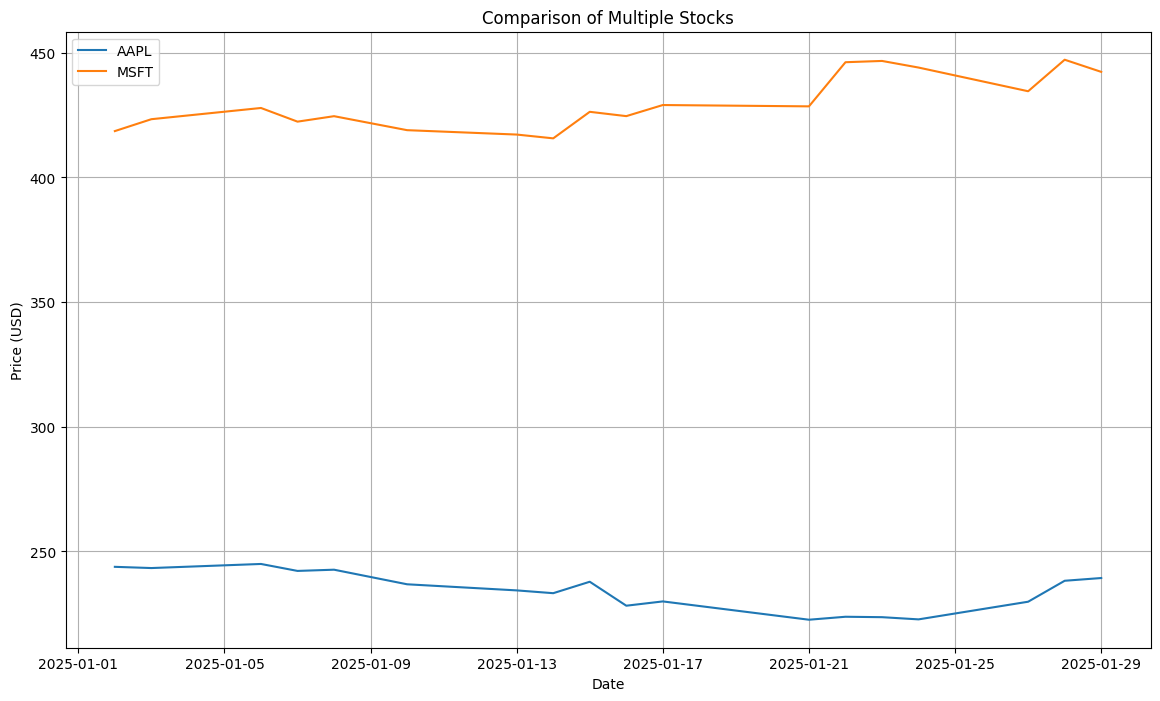

IndexError: index 14 is out of bounds for axis 0 with size 5

In [26]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import mplfinance as mpf
from ta import add_all_ta_features

# Function to fetch stock data
def fetch_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date, end=end_date)
    return data

# Function to calculate technical indicators
def add_technical_indicators(data):
    # Calculate moving averages
    data['SMA_20'] = data['Close'].rolling(window=20).mean()
    data['SMA_50'] = data['Close'].rolling(window=50).mean()

    # Add other indicators using 'ta' library
    data = add_all_ta_features(
        data,
        open="Open",
        high="High",
        low="Low",
        close="Close",
        volume="Volume"
    )
    return data

# Function to plot stock data with technical indicators and volume
def plot_stock_data(data, ticker):
    # Create a new figure
    fig, axes = mpf.plot(data, type='candle',
                         volume=True,
                         mav=(20, 50),
                         style='charles',
                         title=f'Stock Price and Indicators for {ticker}',
                         returnfig=True)

    # Plot RSI
    ax_rsi = fig.add_subplot(313)
    ax_rsi.plot(data.index, data['momentum_rsi'], label='RSI')
    ax_rsi.axhline(70, color='r', linestyle='--')
    ax_rsi.axhline(30, color='g', linestyle='--')
    ax_rsi.set_title('Relative Strength Index (RSI)')
    ax_rsi.legend()
    ax_rsi.grid(True)

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Function to handle multiple tickers
def fetch_multiple_stocks(tickers, start_date, end_date):
    data = {}
    for ticker in tickers:
        data[ticker] = fetch_stock_data(ticker, start_date, end_date)
    return data

# Function to plot multiple stocks on the same chart
def plot_multiple_stocks(data, tickers):
    plt.figure(figsize=(14, 8))
    for ticker in tickers:
        plt.plot(data[ticker].index, data[ticker]['Close'], label=ticker)
    plt.title(f'Comparison of Multiple Stocks')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive widgets
ticker_input = widgets.Text(
    value='AAPL',
    description='Ticker:',
    disabled=False
)

start_date_input = widgets.DatePicker(
    description='Start Date:',
    disabled=False
)

end_date_input = widgets.DatePicker(
    description='End Date:',
    disabled=False
)

multiple_tickers_input = widgets.Text(
    value='AAPL,MSFT',
    description='Multiple Tickers (comma-separated):',
    disabled=False
)

button = widgets.Button(
    description='Fetch Data',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
)

compare_button = widgets.Button(
    description='Compare Stocks',
    disabled=False,
    button_style='',
    tooltip='Compare selected stocks'
)

# Define what happens when the buttons are clicked
def on_fetch_button_click(b):
    ticker = ticker_input.value
    start_date = start_date_input.value
    end_date = end_date_input.value

    if start_date and end_date:
        start_date = start_date.strftime('%Y-%m-%d')
        end_date = end_date.strftime('%Y-%m-%d')
        data = fetch_stock_data(ticker, start_date, end_date)
        if not data.empty:
            data = add_technical_indicators(data)
            plot_stock_data(data, ticker)
        else:
            print("No data found. Please check the ticker symbol and date range.")
    else:
        print("Please select both start and end dates.")

def on_compare_button_click(b):
    multiple_tickers = multiple_tickers_input.value.split(',')
    start_date = start_date_input.value
    end_date = end_date_input.value

    if start_date and end_date:
        start_date = start_date.strftime('%Y-%m-%d')
        end_date = end_date.strftime('%Y-%m-%d')
        data = fetch_multiple_stocks(multiple_tickers, start_date, end_date)
        plot_multiple_stocks(data, multiple_tickers)
    else:
        print("Please select both start and end dates.")

button.on_click(on_fetch_button_click)
compare_button.on_click(on_compare_button_click)

# Display the widgets
display(ticker_input, start_date_input, end_date_input, button, multiple_tickers_input, compare_button)

Text(value='AAPL', description='Ticker:')

DatePicker(value=None, description='Start Date:')

DatePicker(value=None, description='End Date:')

Button(description='Fetch Data', style=ButtonStyle(), tooltip='Fetch stock data')

Text(value='AAPL,MSFT', description='Multiple Tickers:')

Button(description='Compare Stocks', style=ButtonStyle(), tooltip='Compare selected stocks')

ERROR:yfinance:$AAPL: possibly delisted; no price data found  (1d 2025-01-01 -> 2025-01-01)


No data found for AAPL. Check the ticker symbol and date range.


IndexError: index 14 is out of bounds for axis 0 with size 6

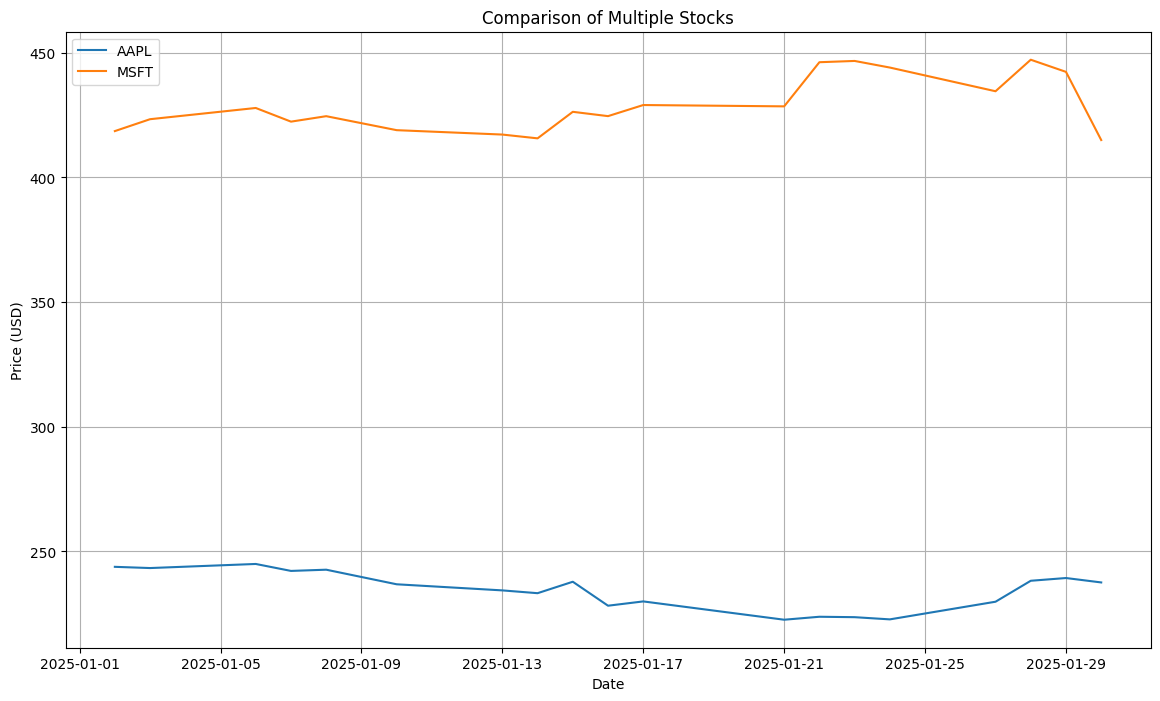

In [27]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import mplfinance as mpf
from ta import add_all_ta_features

# Function to fetch stock data
def fetch_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date, end=end_date)

    if data.empty:
        print(f"No data found for {ticker}. Check the ticker symbol and date range.")

    return data

# Function to calculate technical indicators
def add_technical_indicators(data):
    if len(data) < 15:  # Ensure enough data points for ADX and other indicators
        print("Not enough data to calculate technical indicators.")
        return data  # Return unmodified data

    # Calculate moving averages
    data['SMA_20'] = data['Close'].rolling(window=20).mean()
    data['SMA_50'] = data['Close'].rolling(window=50).mean()

    # Add technical indicators using 'ta' library
    data = add_all_ta_features(
        data,
        open="Open",
        high="High",
        low="Low",
        close="Close",
        volume="Volume"
    )
    return data

# Function to plot stock data with technical indicators and volume
def plot_stock_data(data, ticker):
    if data.empty:
        print(f"No data available to plot for {ticker}.")
        return

    fig, axes = mpf.plot(
        data, type='candle', volume=True, mav=(20, 50),
        style='charles', title=f'Stock Price and Indicators for {ticker}',
        returnfig=True
    )

    # Plot RSI if available
    if 'momentum_rsi' in data.columns:
        ax_rsi = fig.add_subplot(313)
        ax_rsi.plot(data.index, data['momentum_rsi'], label='RSI')
        ax_rsi.axhline(70, color='r', linestyle='--')
        ax_rsi.axhline(30, color='g', linestyle='--')
        ax_rsi.set_title('Relative Strength Index (RSI)')
        ax_rsi.legend()
        ax_rsi.grid(True)

    plt.tight_layout()
    plt.show()

# Function to fetch multiple stocks
def fetch_multiple_stocks(tickers, start_date, end_date):
    data = {}
    for ticker in tickers:
        stock_data = fetch_stock_data(ticker, start_date, end_date)
        if not stock_data.empty:
            data[ticker] = stock_data
    return data

# Function to plot multiple stocks on the same chart
def plot_multiple_stocks(data, tickers):
    plt.figure(figsize=(14, 8))
    for ticker in tickers:
        if ticker in data:
            plt.plot(data[ticker].index, data[ticker]['Close'], label=ticker)
    plt.title('Comparison of Multiple Stocks')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive widgets
ticker_input = widgets.Text(value='AAPL', description='Ticker:')
start_date_input = widgets.DatePicker(description='Start Date:')
end_date_input = widgets.DatePicker(description='End Date:')
multiple_tickers_input = widgets.Text(value='AAPL,MSFT', description='Multiple Tickers:')
fetch_button = widgets.Button(description='Fetch Data', tooltip='Fetch stock data')
compare_button = widgets.Button(description='Compare Stocks', tooltip='Compare selected stocks')

# Define what happens when the buttons are clicked
def on_fetch_button_click(b):
    ticker = ticker_input.value.strip().upper()
    start_date = start_date_input.value
    end_date = end_date_input.value

    if start_date and end_date:
        start_date = start_date.strftime('%Y-%m-%d')
        end_date = end_date.strftime('%Y-%m-%d')

        data = fetch_stock_data(ticker, start_date, end_date)
        if not data.empty:
            data = add_technical_indicators(data)
            plot_stock_data(data, ticker)
    else:
        print("Please select both start and end dates.")

def on_compare_button_click(b):
    multiple_tickers = [t.strip().upper() for t in multiple_tickers_input.value.split(',')]
    start_date = start_date_input.value
    end_date = end_date_input.value

    if start_date and end_date:
        start_date = start_date.strftime('%Y-%m-%d')
        end_date = end_date.strftime('%Y-%m-%d')

        data = fetch_multiple_stocks(multiple_tickers, start_date, end_date)
        if data:
            plot_multiple_stocks(data, multiple_tickers)
        else:
            print("No valid data found for the selected tickers.")
    else:
        print("Please select both start and end dates.")

fetch_button.on_click(on_fetch_button_click)
compare_button.on_click(on_compare_button_click)

# Display widgets
display(ticker_input, start_date_input, end_date_input, fetch_button, multiple_tickers_input, compare_button)


interactive(children=(Text(value='AAPL,MSFT', description='Tickers (comma-separated):'), DatePicker(value=Time…

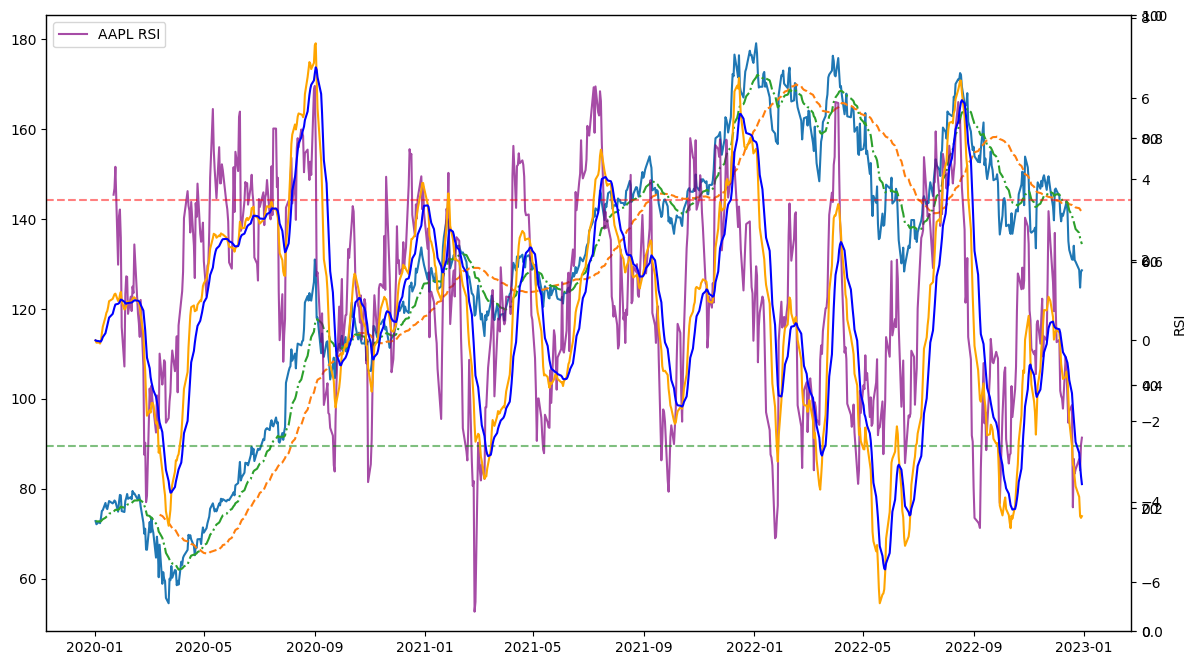

In [29]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, widgets
import numpy as np

# Function to fetch stock data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# Function to plot stock data with technical indicators
def plot_stock_data_with_indicators(tickers, start_date, end_date, show_volume=True, show_ma=True, show_rsi=True, show_macd=True):
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Create a second y-axis for volume
    ax2 = ax1.twinx()

    for ticker in tickers:
        # Fetch the stock data
        stock_data = get_stock_data(ticker, start_date, end_date)

        if stock_data.empty:
            print(f"No data found for {ticker} between {start_date} and {end_date}")
            continue

        # Plot closing price
        ax1.plot(stock_data.index, stock_data['Close'], label=f'{ticker} Close Price')

        # Plot moving averages
        if show_ma:
            sma_50 = stock_data['Close'].rolling(window=50).mean()
            ema_20 = stock_data['Close'].ewm(span=20, adjust=False).mean()
            ax1.plot(stock_data.index, sma_50, label=f'{ticker} SMA 50', linestyle='--')
            ax1.plot(stock_data.index, ema_20, label=f'{ticker} EMA 20', linestyle='-.')

        # Plot RSI
        if show_rsi:
            rsi = calculate_rsi(stock_data)
            ax3 = ax1.twinx()
            ax3.plot(stock_data.index, rsi, label=f'{ticker} RSI', color='purple', alpha=0.7)
            ax3.axhline(70, color='red', linestyle='--', alpha=0.5)
            ax3.axhline(30, color='green', linestyle='--', alpha=0.5)
            ax3.set_ylim(0, 100)
            ax3.legend(loc='upper left')
            ax3.set_ylabel('RSI')

        # Plot MACD
        if show_macd:
            macd, signal = calculate_macd(stock_data)
            ax4 = ax1.twinx()
            ax4.plot(stock_data.index, macd, label=f'{ticker} MACD', color='orange')
            ax4.plot(stock_data.index, signal, label=f'{ticker} Signal', color='blue')
            ax4.fill_between(stock_data.index, macd - signal, 0, alpha=0.3, color='gray')
            ax4.legend(loc='lower left')
            ax4.set_ylabel('MACD')

        # Plot Volume
        if show_volume:
            ax2.bar(stock_data.index, stock_data['Volume'], label=f'{ticker} Volume', color='gray', alpha=0.3)

    # Set labels and legends
    ax1.set_title(f'Stock Price Comparison from {start_date} to {end_date}')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price (USD)')
    ax1.legend(loc='upper right')
    ax1.grid(True)

    if show_volume:
        ax2.set_ylabel('Volume')

    plt.show()

# Interactive widget for user input
@interact(
    tickers=widgets.Text(value='AAPL,MSFT', description='Tickers (comma-separated):'),
    start_date=widgets.DatePicker(description='Start Date', value=pd.to_datetime('2020-01-01')),
    end_date=widgets.DatePicker(description='End Date', value=pd.to_datetime('2023-01-01')),
    show_volume=widgets.Checkbox(value=True, description='Show Volume'),
    show_ma=widgets.Checkbox(value=True, description='Show Moving Averages'),
    show_rsi=widgets.Checkbox(value=True, description='Show RSI'),
    show_macd=widgets.Checkbox(value=True, description='Show MACD')
)
def interactive_stock_plot(tickers, start_date, end_date, show_volume, show_ma, show_rsi, show_macd):
    # Convert date objects to string format
    start_date_str = start_date.strftime('%Y-%m-%d')
    end_date_str = end_date.strftime('%Y-%m-%d')

    # Split tickers into a list
    ticker_list = [ticker.strip() for ticker in tickers.split(',')]

    # Call the plotting function
    plot_stock_data_with_indicators(ticker_list, start_date_str, end_date_str, show_volume, show_ma, show_rsi, show_macd)

interactive(children=(Text(value='AAPL,MSFT', description='Tickers (comma-separated):'), DatePicker(value=Time…

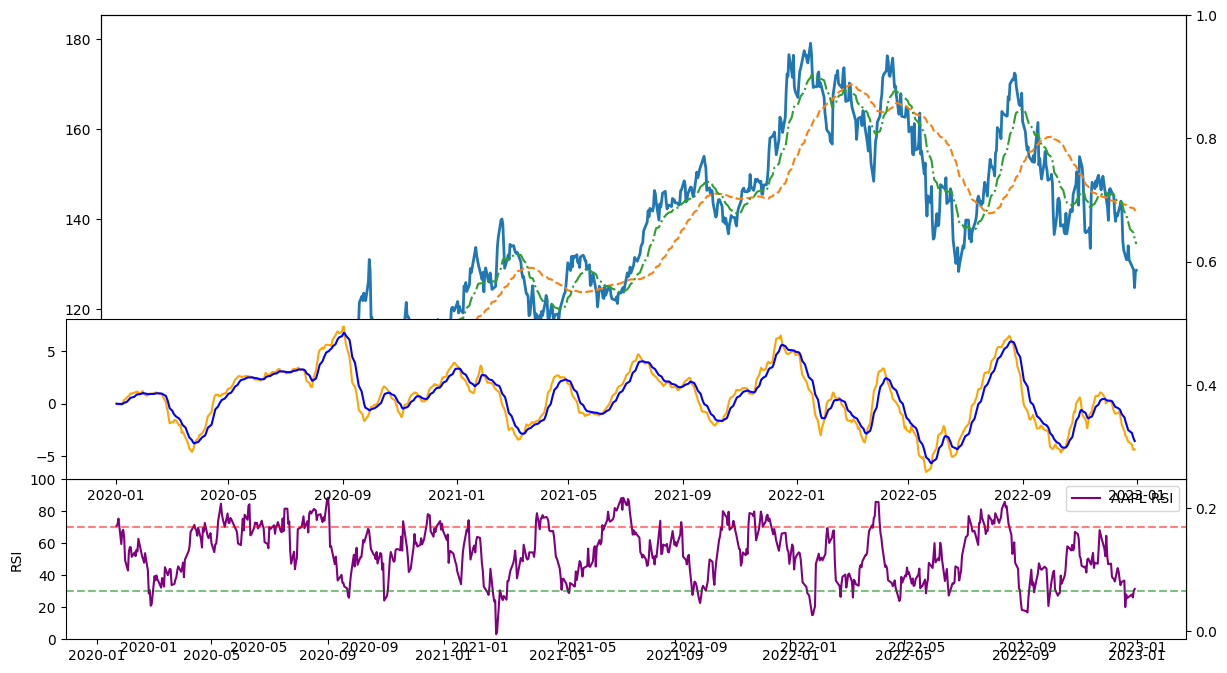

In [32]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, widgets
import numpy as np

# Function to fetch stock data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate RSI
def calculate_rsi(data, window=14):
    if data.empty:
        return pd.Series(dtype=float)  # Return empty series if data is empty
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    if data.empty:
        return pd.Series(dtype=float), pd.Series(dtype=float)  # Return empty series
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# Function to plot stock data with technical indicators
def plot_stock_data_with_indicators(tickers, start_date, end_date, show_volume=True, show_ma=True, show_rsi=True, show_macd=True):
    fig, ax1 = plt.subplots(figsize=(14, 8))
    ax2 = ax1.twinx() if show_volume else None  # Volume axis

    for ticker in tickers:
        # Fetch stock data
        stock_data = get_stock_data(ticker, start_date, end_date)

        if stock_data.empty:
            print(f"No data found for {ticker} between {start_date} and {end_date}")
            continue

        # Plot closing price
        ax1.plot(stock_data.index, stock_data['Close'], label=f'{ticker} Close Price', linewidth=2)

        # Plot moving averages
        if show_ma:
            sma_50 = stock_data['Close'].rolling(window=50).mean()
            ema_20 = stock_data['Close'].ewm(span=20, adjust=False).mean()
            ax1.plot(stock_data.index, sma_50, label=f'{ticker} SMA 50', linestyle='--')
            ax1.plot(stock_data.index, ema_20, label=f'{ticker} EMA 20', linestyle='-.')

        # Plot RSI on a separate subplot
        if show_rsi:
            ax_rsi = fig.add_axes([0.1, 0.1, 0.8, 0.2])  # Positioning below main plot
            rsi = calculate_rsi(stock_data)
            if not rsi.empty:
                ax_rsi.plot(stock_data.index, rsi, label=f'{ticker} RSI', color='purple')
                ax_rsi.axhline(70, color='red', linestyle='--', alpha=0.5)
                ax_rsi.axhline(30, color='green', linestyle='--', alpha=0.5)
                ax_rsi.set_ylim(0, 100)
                ax_rsi.legend(loc='upper right')
                ax_rsi.set_ylabel('RSI')

        # Plot MACD on another subplot
        if show_macd:
            ax_macd = fig.add_axes([0.1, 0.3, 0.8, 0.2])  # Positioning below RSI
            macd, signal = calculate_macd(stock_data)
            if not macd.empty:
                ax_macd.plot(stock_data.index, macd, label=f'{ticker} MACD', color='orange')
                ax_macd.plot(stock_data.index, signal, label=f'{ticker} Signal', color='blue')
                ax_macd.fill_between(stock_data.index, macd - signal, 0, alpha=0.3, color='gray')
                ax_macd.legend(loc='upper right')
                ax_macd.set_ylabel('MACD')

        # Plot Volume
        if show_volume and ax2:
            ax2.bar(stock_data.index, stock_data['Volume'], label=f'{ticker} Volume', color='gray', alpha=0.3)

    # Set labels and legends
    ax1.set_title(f'Stock Price Comparison from {start_date} to {end_date}')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price (USD)')
    ax1.legend(loc='upper right')
    ax1.grid(True)

    if show_volume and ax2:
        ax2.set_ylabel('Volume')

    plt.show()

# Interactive widget for user input
@interact(
    tickers=widgets.Text(value='AAPL,MSFT', description='Tickers (comma-separated):'),
    start_date=widgets.DatePicker(description='Start Date', value=pd.to_datetime('2020-01-01')),
    end_date=widgets.DatePicker(description='End Date', value=pd.to_datetime('2023-01-01')),
    show_volume=widgets.Checkbox(value=True, description='Show Volume'),
    show_ma=widgets.Checkbox(value=True, description='Show Moving Averages'),
    show_rsi=widgets.Checkbox(value=True, description='Show RSI'),
    show_macd=widgets.Checkbox(value=True, description='Show MACD')
)
def interactive_stock_plot(tickers, start_date, end_date, show_volume, show_ma, show_rsi, show_macd):
    # Convert date objects to string format
    start_date_str = start_date.strftime('%Y-%m-%d')
    end_date_str = end_date.strftime('%Y-%m-%d')

    # Split tickers into a list
    ticker_list = [ticker.strip() for ticker in tickers.split(',')]

    # Call the plotting function
    plot_stock_data_with_indicators(ticker_list, start_date_str, end_date_str, show_volume, show_ma, show_rsi, show_macd)


interactive(children=(Text(value='AAPL,MSFT', description='Tickers (comma-separated):'), DatePicker(value=Time…

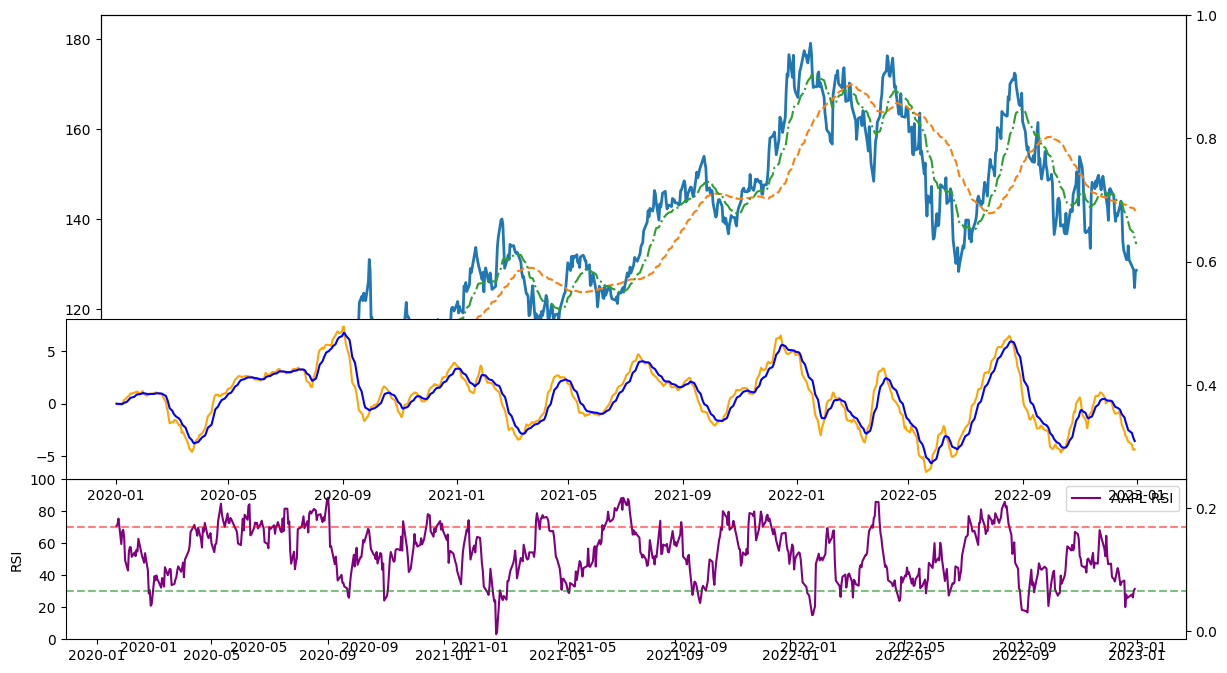

In [33]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, widgets
import numpy as np

# Function to fetch stock data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate RSI
def calculate_rsi(data, window=14):
    if data.empty:
        return pd.Series(dtype=float)  # Return empty series if data is empty
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    if data.empty:
        return pd.Series(dtype=float), pd.Series(dtype=float)  # Return empty series
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# Function to plot stock data with technical indicators
def plot_stock_data_with_indicators(tickers, start_date, end_date, show_volume=True, show_ma=True, show_rsi=True, show_macd=True):
    fig, ax1 = plt.subplots(figsize=(14, 8))
    ax2 = ax1.twinx() if show_volume else None  # Volume axis

    for ticker in tickers:
        # Fetch stock data
        stock_data = get_stock_data(ticker, start_date, end_date)

        if stock_data.empty:
            print(f"No data found for {ticker} between {start_date} and {end_date}")
            continue

        # Plot closing price
        ax1.plot(stock_data.index, stock_data['Close'], label=f'{ticker} Close Price', linewidth=2)

        # Plot moving averages
        if show_ma:
            sma_50 = stock_data['Close'].rolling(window=50).mean()
            ema_20 = stock_data['Close'].ewm(span=20, adjust=False).mean()
            ax1.plot(stock_data.index, sma_50, label=f'{ticker} SMA 50', linestyle='--')
            ax1.plot(stock_data.index, ema_20, label=f'{ticker} EMA 20', linestyle='-.')

        # Plot RSI on a separate subplot
        if show_rsi:
            ax_rsi = fig.add_axes([0.1, 0.1, 0.8, 0.2])  # Positioning below main plot
            rsi = calculate_rsi(stock_data)
            if not rsi.empty:
                ax_rsi.plot(stock_data.index, rsi, label=f'{ticker} RSI', color='purple')
                ax_rsi.axhline(70, color='red', linestyle='--', alpha=0.5)
                ax_rsi.axhline(30, color='green', linestyle='--', alpha=0.5)
                ax_rsi.set_ylim(0, 100)
                ax_rsi.legend(loc='upper right')
                ax_rsi.set_ylabel('RSI')

        # Plot MACD on another subplot
        if show_macd:
            ax_macd = fig.add_axes([0.1, 0.3, 0.8, 0.2])  # Positioning below RSI
            macd, signal = calculate_macd(stock_data)
            if not macd.empty:
                ax_macd.plot(stock_data.index, macd, label=f'{ticker} MACD', color='orange')
                ax_macd.plot(stock_data.index, signal, label=f'{ticker} Signal', color='blue')
                ax_macd.fill_between(stock_data.index, macd - signal, 0, alpha=0.3, color='gray')
                ax_macd.legend(loc='upper right')
                ax_macd.set_ylabel('MACD')

        # Plot Volume
        if show_volume and ax2:
            ax2.bar(stock_data.index, stock_data['Volume'], label=f'{ticker} Volume', color='gray', alpha=0.3)

    # Set labels and legends
    ax1.set_title(f'Stock Price Comparison from {start_date} to {end_date}')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price (USD)')
    ax1.legend(loc='upper right')
    ax1.grid(True)

    if show_volume and ax2:
        ax2.set_ylabel('Volume')

    plt.show()

# Interactive widget for user input
@interact(
    tickers=widgets.Text(value='AAPL,MSFT', description='Tickers (comma-separated):'),
    start_date=widgets.DatePicker(description='Start Date', value=pd.to_datetime('2020-01-01')),
    end_date=widgets.DatePicker(description='End Date', value=pd.to_datetime('2023-01-01')),
    show_volume=widgets.Checkbox(value=True, description='Show Volume'),
    show_ma=widgets.Checkbox(value=True, description='Show Moving Averages'),
    show_rsi=widgets.Checkbox(value=True, description='Show RSI'),
    show_macd=widgets.Checkbox(value=True, description='Show MACD')
)
def interactive_stock_plot(tickers, start_date, end_date, show_volume, show_ma, show_rsi, show_macd):
    # Convert date objects to string format
    start_date_str = start_date.strftime('%Y-%m-%d')
    end_date_str = end_date.strftime('%Y-%m-%d')

    # Split tickers into a list
    ticker_list = [ticker.strip() for ticker in tickers.split(',')]

    # Call the plotting function
    plot_stock_data_with_indicators(ticker_list, start_date_str, end_date_str, show_volume, show_ma, show_rsi, show_macd)
